# Python Assignment 3

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


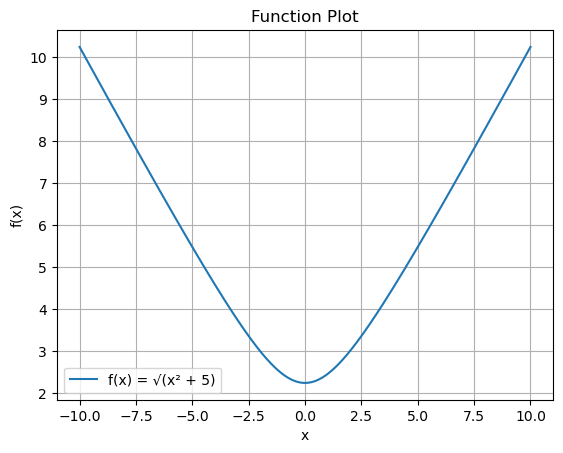

In [10]:
import numpy as np  # Import the numpy library for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting the graph

# Define the function f(x). This function calculates the square root of (x² + 5)
def f(x):
    return np.sqrt(x**2 + 5)

# Generate an array of x values from -10 to 10 with 500 points
x_vals = np.linspace(-10, 10, 500)

# Calculate the corresponding y values by applying the function f(x) to x_vals
y_vals = f(x_vals)

# Create a plot of the function, labeling it as 'f(x) = √(x² + 5)'
plt.plot(x_vals, y_vals, label='f(x) = √(x² + 5)')

# Set the title of the plot
plt.title('Function Plot')

# Label the x-axis
plt.xlabel('x')

# Label the y-axis
plt.ylabel('f(x)')

# Display a legend in the plot to explain the curve
plt.legend()

# Display a grid on the plot for better readability
plt.grid(True)

# Show the plot
plt.show()

Final x_T for step size 0.1: 5.220026939402208
Final x_T for step size 0.5: 0.0007105008208514272
Final x_T for step size 1.0: 6.853412458857222e-11


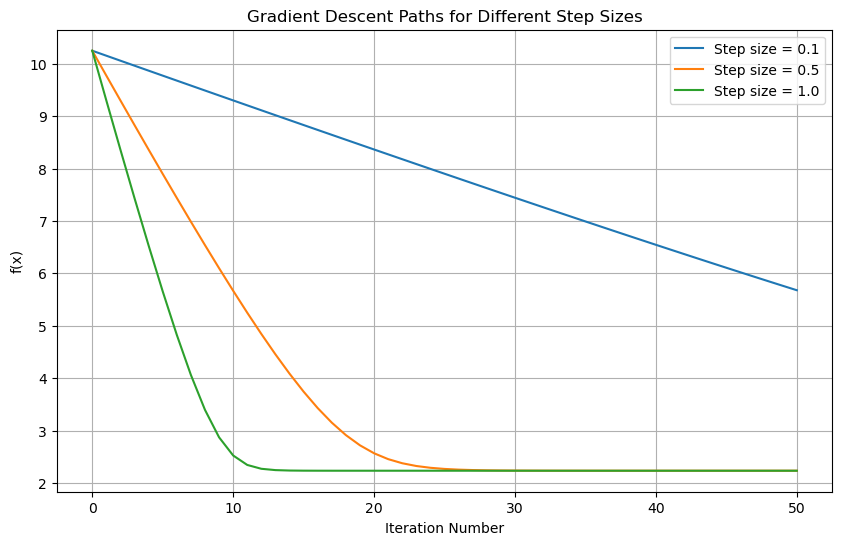

In [11]:
# Define the function f(x) = √(x² + 5) and its gradient (derivative)
def f(x):
    return np.sqrt(x**2 + 5)  # Function to compute the value of f(x)

def gradient(x):
    return x / np.sqrt(x**2 + 5)  # Derivative of f(x), used in the gradient descent update rule

# Implement the Gradient Descent Algorithm
def gradient_descent(x0, step_size, num_iterations):
    x = x0  # Initialize x with the starting point x0
    path = [x]  # Initialize a list to store the path of x-values during iterations
    for _ in range(num_iterations):  # Perform the gradient descent for the specified number of iterations
        grad = gradient(x)  # Calculate the gradient (derivative) at the current x
        x -= step_size * grad  # Update x using the gradient and the step size
        path.append(x)  # Append the new x to the path
    return np.array(path)  # Return the full path of x-values during gradient descent

# Set initial values for the gradient descent algorithm
initial_x = 10  # Initial x-value where the algorithm starts
step_sizes = [0.1, 0.5, 1.0]  # List of step sizes to experiment with
num_iterations = 50  # Number of iterations to run the gradient descent algorithm

# Plot the function values f(x_k) vs. iteration number for different step sizes
plt.figure(figsize=(10, 6))  # Create a figure with a specific size for the plot
for step_size in step_sizes:  # Loop through each step size to run gradient descent
    path = gradient_descent(initial_x, step_size, num_iterations)  # Get the path of x-values
    
    # Plot f(x_k) values (i.e., function values) against the iteration number
    plt.plot(range(len(path)), f(path), label=f'Step size = {step_size}')
    
    # Print the final x-value after the gradient descent (x_T)
    print(f"Final x_T for step size {step_size}: {path[-1]}")

# Add title and labels to the plot
plt.title('Gradient Descent Paths for Different Step Sizes')
plt.xlabel('Iteration Number')  # Label for the x-axis
plt.ylabel('f(x)')  # Label for the y-axis
plt.legend()  # Add a legend to the plot to differentiate between step sizes
plt.grid(True)  # Display a grid for better readability

# Save the plot as an image file with a high resolution
plt.savefig("results/linear_regression_gradientDescent.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept (bias term): 3.7984062217921952
Coefficients: [4.11257981 0.47036286]


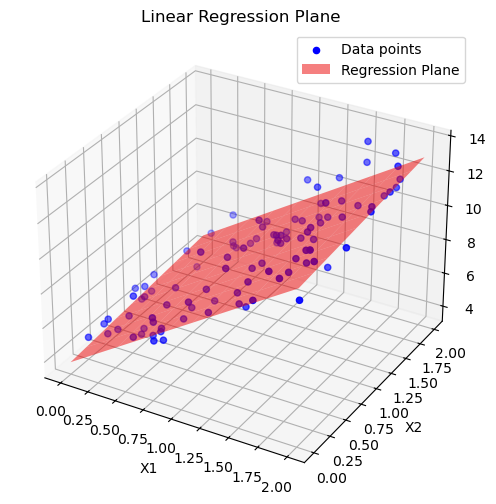

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(5)  # Change the seed to be the last two digits of your SB ID
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias term (intercept) in the normal equation
X_b = np.c_[np.ones((100, 1)), X]  # Add a column of ones to the left of X

# Find theta (coefficients) using the normal equation: theta = (X^T * X)^-1 * X^T * y
theta = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)

# Print the intercept and coefficients of the regression plane
print(f"Intercept (bias term): {theta[0]}")
print(f"Coefficients: {theta[1:]}")

# Plot the generated data and the regression plane
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data points')

# Generate a meshgrid for plotting the regression plane
x0_range = np.linspace(0, 2, 10)
x1_range = np.linspace(0, 2, 10)
x0_mesh, x1_mesh = np.meshgrid(x0_range, x1_range)

# Compute the predicted y values for the meshgrid
y_pred = theta[0] + theta[1] * x0_mesh + theta[2] * x1_mesh

# Plot the regression plane
ax.plot_surface(x0_mesh, x1_mesh, y_pred, color='red', alpha=0.5, label='Regression Plane')

# Set plot labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Linear Regression Plane')

plt.legend()
plt.savefig("results/linear_regression_plane.png", dpi=300, bbox_inches='tight')
plt.show()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function to calculate the logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Seed for reproducibility
np.random.seed(595)

# Generate synthetic data for logistic regression
X = np.random.rand(2, 100)  # Two features and 100 samples
w_true = np.array([1.5, -2.5])  # True weights for generating labels
b_true = 1.0  # True bias term
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)  # Compute probabilities
Y = (probabilities > 0.5).astype(int)  # Generate binary labels based on threshold

# Add some noise to the features to simulate real-world data
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split the dataset into training and testing sets
X_train, X_test = X[:, :80], X[:, 80:]  # 80% for training, 20% for testing
Y_train, Y_test = Y[:80], Y[80:]  # Corresponding labels

# Initialize model parameters (weights and bias) to zero
w = np.zeros(X.shape[0])  # Initialize weights for two features
b = 0.0  # Initialize bias

# Hyperparameters: Tune learning rate and number of epochs
learning_rate = 0.1  # Learning rate to control step size during gradient descent
num_epochs = 1000  # Number of iterations to train the model

# Gradient Descent Optimization
for epoch in range(num_epochs):
    # Forward pass: Calculate predictions for training data
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # Compute gradients of the cost function with respect to weights and bias
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)  # Gradient for weights
    dJdb = np.mean(A_train - Y_train)  # Gradient for bias

    # Update weights and bias using gradient descent
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

# Evaluate the model on the training set
A_train = sigmoid(np.dot(w.T, X_train) + b)  # Compute predictions
predictions_train = (A_train > 0.5).astype(int)  # Convert probabilities to binary labels
train_accuracy = np.mean(predictions_train == Y_train)  # Calculate training accuracy

# Evaluate the model on the test set
A_test = sigmoid(np.dot(w.T, X_test) + b)  # Compute predictions
predictions_test = (A_test > 0.5).astype(int)  # Convert probabilities to binary labels
test_accuracy = np.mean(predictions_test == Y_test)  # Calculate test accuracy

# Display accuracy results
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.88
Test Set Accuracy: 1.00


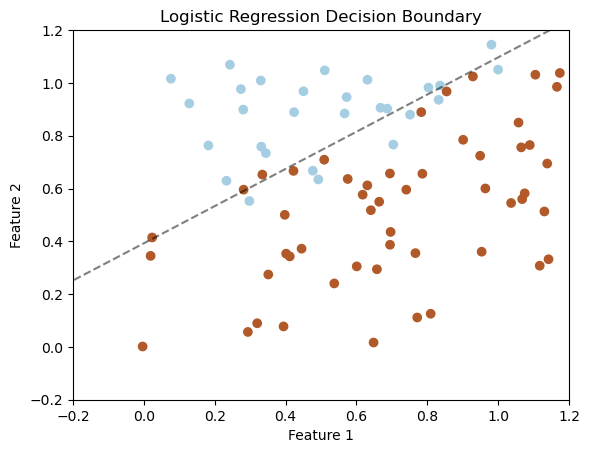

In [6]:
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.savefig("results/logistic_boundary_train.png", dpi=300, bbox_inches='tight')
plt.show()

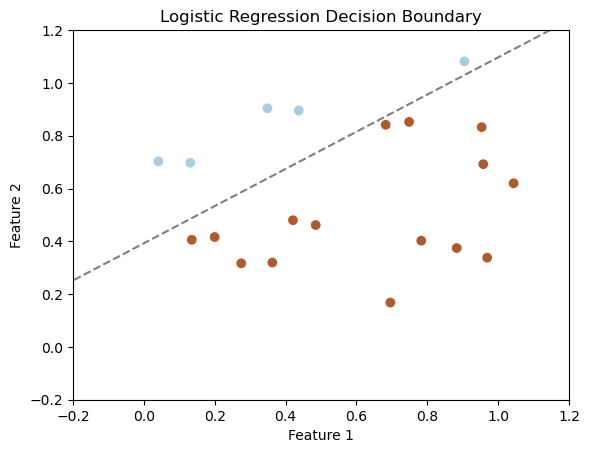

In [7]:
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.savefig("results/logistic_boundary_test.png", dpi=300, bbox_inches='tight')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5